<a href="https://colab.research.google.com/github/r4phael/ml-course/blob/master/notebooks/3_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Semana 3 - Modelos de Regressão**

### Importando libs e funções:

Importando libs

In [0]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from matplotlib.colors import ListedColormap

Importando funções

In [0]:
# Função de escalonamento
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

# Função que gera o gráfico dos resultados de regressão
def plot_results_linear(X, y, regressor, title):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, regressor.predict(X), color = 'blue')
    plt.title(title)
    plt.xlabel('Tamanho do Lote')
    plt.ylabel('Preço de Vendas')
    plt.show()

# Função que gera o gráfico dos resultados de regerssão polinomial
def plot_results_poly(X, y, lin_reg_poly, poly_reg, title):
    plt.scatter(X, y, color = 'red')
    plt.plot(X, lin_reg_poly.predict(poly_reg.fit_transform(X)), color = 'blue')
    plt.title(title)
    plt.xlabel('Tamanho do Lote')
    plt.ylabel('Preço de Vendas')
    plt.show()    
    
# Função que gera o gráfico dos resultados de arvores
def plot_results_reg(X, y, regressor, title):     
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'red')
    plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
    plt.title(title)
    plt.xlabel('Tamanho do Lote')
    plt.ylabel('Preço de Vendas')
    plt.show()
     

### Etapa de exploração e tratamento dos **dados**

Importando o dataset do nosso estudo. O objetivo dos modelos de regressão será de predizer o preço das casas de acordo com diferentes caracteristicas como: localização, área, etc.

Fonte: [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/r4phael/ml-course/master/data/pricing_houses.csv')

#Selecionando uma amostragem dos dados para uma melhor visualização
df = df.loc[:, ['LotArea', 'PoolArea', 'GarageArea', 'OverallCond','YearBuilt', 'MSZoning', 'SalePrice']].sample(n=60, random_state=0, weights = 'SalePrice')

Descrevendo o dataset

In [0]:
df.describe()

,LotArea,PoolArea,GarageArea,OverallCond,YearBuilt,SalePrice
count,60.000000,60.0,60.000000,60.000000,60.000000,60.000000
mean,11633.933333,0.0,504.683333,5.783333,1972.116667,197536.150000
std,8099.879028,0.0,222.427554,1.180228,30.522618,74910.507145
min,1477.000000,0.0,0.000000,3.000000,1875.000000,80000.000000
25%,8068.500000,0.0,440.000000,5.000000,1950.750000,142250.000000
50%,10510.000000,0.0,542.000000,5.000000,1976.500000,188750.000000
75%,12010.750000,0.0,607.250000,7.000000,2002.000000,235032.000000
max,53227.000000,0.0,1014.000000,9.000000,2009.000000,437154.000000


Visualizando o dataset

In [0]:
df.head(5)

,LotArea,PoolArea,GarageArea,OverallCond,YearBuilt,MSZoning,SalePrice
789,12205,0,444,8,1966,RL,187500
1039,1477,0,286,4,1970,RM,80000
868,14762,0,672,6,1948,RL,169000
782,16285,0,605,5,2001,RL,187100
611,10395,0,564,6,1978,RL,148000


Preenchendo os valores númericos nulos (NA) com a mediana.

In [0]:
df = df.fillna(df.median())

df.head(5)

,LotArea,PoolArea,GarageArea,OverallCond,YearBuilt,MSZoning,SalePrice
789,12205,0,444,8,1966,RL,187500
1039,1477,0,286,4,1970,RM,80000
868,14762,0,672,6,1948,RL,169000
782,16285,0,605,5,2001,RL,187100
611,10395,0,564,6,1978,RL,148000


Definindo as variáveis independentes

In [0]:
X = df.loc[:, 'LotArea'].values.reshape(-1,1)
X[:5]


array([[12205],
       [ 1477],
       [14762],
       [16285],
       [10395]])

Definindo as variáveis dependentes.

In [0]:
y = df.loc[:, 'SalePrice'].values.reshape(-1,1)
y[:5]


array([[187500],
       [ 80000],
       [169000],
       [187100],
       [148000]])

 Criando os subconjuntos de treinamento e testes

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Tamanho do Dataset. {}".format(df.shape[0]))
print("Tamanho do Conjunto de Treinamento. {}".format(len(X_train)))
print("Tamanho do Conjunto de Testes. {}".format(len(X_test)))

Tamanho do Dataset. 60
Tamanho do Conjunto de Treinamento. 48
Tamanho do Conjunto de Testes. 12


Normalizando as features 

In [0]:
#X_train = feature_scaling(X_train)
#X_test = feature_scaling(X_test)

#X_train[:5]

###  Modelo - Regressão Linear

Importando e treinando o modelo de Regressao Linear com o Conjunto de Treinamento:

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prevendo os resultados do modelo criado com o conjunto de testes

In [0]:
y_pred = regressor.predict(X_test)

y_pred

array([[207117.08544721],
       [183686.58545274],
       [169299.32577351],
       [179936.94922447],
       [188476.03676953],
       [191960.99279345],
       [202201.59593788],
       [465634.02218018],
       [206688.55559255],
       [176212.52063471],
       [195653.91183507],
       [185759.91372014]])

Avaliando o modelo com a métrica r²

In [0]:
regressor.score(X_test, y_test)

-0.9506477517227611

Exibindo os resultados do conjunto de treinamento

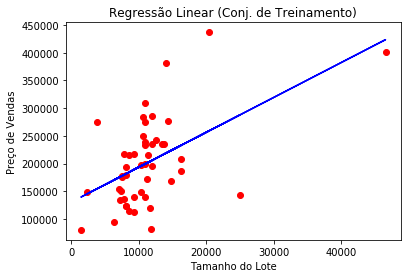

In [0]:
plot_results_linear(X_train, y_train, regressor, 'Regressão Linear (Conj. de Treinamento)')

Exibindo os resultados do conjunto de testes

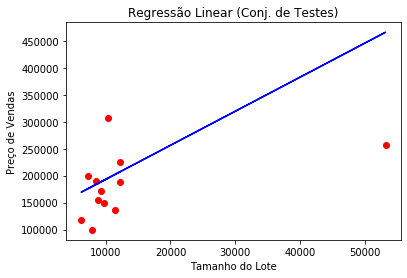

In [0]:
plot_results_linear(X_test, y_test, regressor, 'Regressão Linear (Conj. de Testes)')

###  Modelo - Regressão Polynomial

Importando e treinando o modelo de Regressao Linear com o Conjunto de Treinamento:

In [0]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Transformando as features na quarta ordem polinomial:

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

Treinando o modelo de regressão polynomial com o conjunto de treinamento:

In [0]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prevendo os resultados do modelo criado com o conjunto de testes

In [0]:
y_pred = lin_reg_poly.predict(X_poly)

y_pred[:5]

array([[210977.15912637],
       [101264.45016613],
       [231210.99529702],
       [242927.64582841],
       [195940.94028164]])

Avaliando o modelo de regressão linear com a métrica r2:

In [0]:
regressor.score(X, y)

0.14645648066355865

Avaliando o modelo de regressão polynomial com a métrica r2:

In [0]:
lin_reg_poly.score(X_poly, y)

0.2824360477057858

Visualizando os resultados da regressão linear:

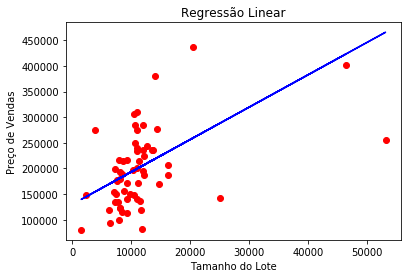

In [0]:
plot_results_linear(X, y, regressor, 'Regressão Linear')

Visualizando os resultados da regressão linear polinomial:

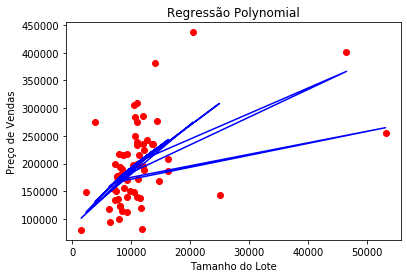

In [0]:
plot_results_poly(X, y, lin_reg_poly, poly_reg, 'Regressão Polynomial')

###  Modelo - Árvore de Decisão 

Treinando o modelo de Arvore de Decisão  com o Conjunto de Treinamento

In [0]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Prevendo os resultados do modelo criado com o conjunto de testes

In [0]:
y_pred = regressor.predict(X_test)

y_pred

array([195000., 115000.,  94000., 216500., 139400., 113000., 214900.,
       402000., 195000., 150750., 148000., 215200.])

Avaliando o modelo com a métrica r2

In [0]:
regressor.score(X_test, y_test)

-1.1563461633885121

Exibindo os resultados do conjunto de treinamento

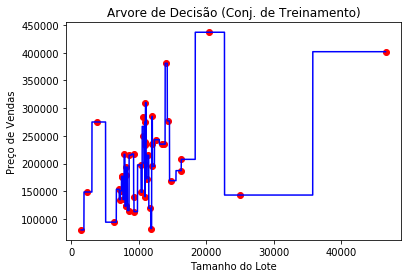

In [0]:
plot_results_reg(X_train, y_train, regressor, 'Arvore de Decisão (Conj. de Treinamento)')

Exibindo os resultados do conjunto de testes

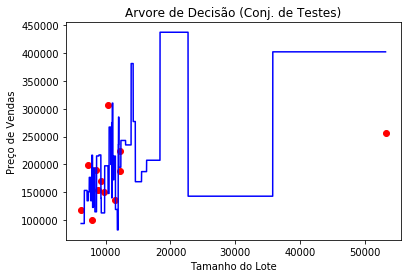

In [0]:
plot_results_reg(X_test, y_test, regressor, 'Arvore de Decisão (Conj. de Testes)')

###  Modelo - Random Forest

Treinando o modelo de Random Forest com o Conjunto de Treinamento

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Prevendo os resultados do modelo criado com o conjunto de testes

In [0]:
y_pred = regressor.predict(X_test)

y_pred

array([195000., 115000.,  94000., 216500., 139400., 113000., 214900.,
       402000., 195000., 150750., 148000., 215200.])

Avaliando o modelo com a métrica r2

In [0]:
regressor.score(X_test, y_test)

-1.1563461633885121

Exibindo os resultados do conjunto de treinamento

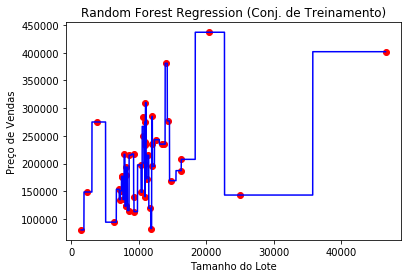

In [0]:
plot_results_reg(X_train, y_train, regressor, 'Random Forest Regression (Conj. de Treinamento)')

Exibindo os resultados do conjunto de testes

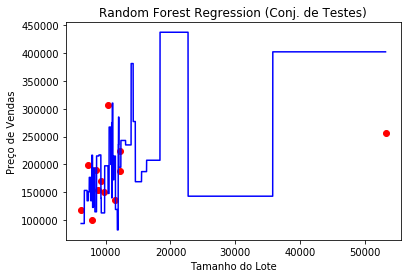

In [0]:
plot_results_reg(X_test, y_test, regressor, 'Random Forest Regression (Conj. de Testes)')

###  Modelo - SVR

Normalização das features:

In [0]:
X_train = feature_scaling(X_train)
X_test = feature_scaling(X_test)

Treinando o modelo SVR com o Conjunto de Treinamento

In [0]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Prevendo os resultados com o conjunto de testes:

In [0]:
y_pred = regressor.predict(X_test)

y_pred

array([194251.44370433, 194247.70187487, 194245.70018159, 194247.1367784 ,
       194248.45357491, 194249.01439172, 194250.67281124, 194249.47673342,
       194251.37775764, 194246.60246747, 194249.61450541, 194248.02383322])

Avaliando o modelo com a métrica r2

In [0]:
regressor.score(X_test, y_test)

-0.041556703288624375

Exibindo os resultados do conjunto de treinamento

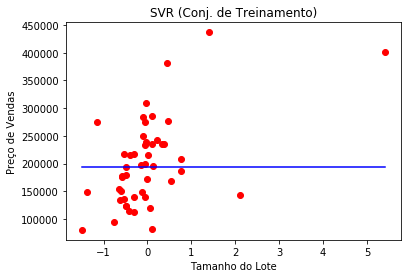

In [0]:
plot_results_reg(X_train, y_train, regressor, 'SVR (Conj. de Treinamento)')

Exibindo os resultados do conjunto de testes

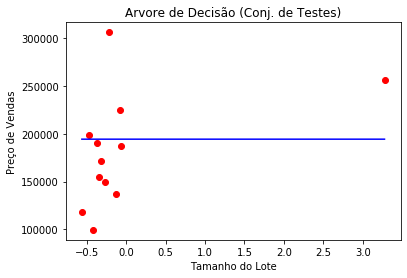

In [0]:
plot_results_reg(X_test, y_test, regressor, 'Arvore de Decisão (Conj. de Testes)')

###  Modelo - Regressão Linear Múltipla

Selecionando as principais features do dataset:

In [0]:
df = df.loc[:, ['LotArea', 'PoolArea', 'GarageArea', 'OverallCond','YearBuilt', 'MSZoning', 'SalePrice']].sample(n=60, random_state=0, weights = 'SalePrice')

df.head(5)

,LotArea,PoolArea,GarageArea,OverallCond,YearBuilt,MSZoning,SalePrice
661,46589,0,711,7,1994,RL,402000
964,11316,0,510,5,2002,RL,214900
891,11184,0,440,5,1978,RL,172500
926,11999,0,656,5,2003,RL,285000
1374,10625,0,936,5,2005,FV,250000


Exibir os valores distintos da coluna MSZoning. **Segue legenda:**
FV-Residencial de Vila Flutuante, RH- Residencial de Densidade Alta, RL-Residencial de Densidade Baixa, RM-Residencial de Densidade Média.

In [0]:
df['MSZoning'].unique()

array(['RL', 'FV', 'RM', 'RH'], dtype=object)

Codificando as variáveis Categóricos e evitando a armadilha da variável Dummy. **Obs:** Algumas técnicas de aprendizado de máquina exigem que você elimine uma dimensão da apresentação para evitar a dependência entre as variáveis. Isso pode ser feito através do parâmetro "drop_first = True".

In [0]:
df = pd.get_dummies(df , columns = ['MSZoning'], drop_first=True)

df.head(5)

,LotArea,PoolArea,GarageArea,OverallCond,YearBuilt,SalePrice,MSZoning_RH,MSZoning_RL,MSZoning_RM
661,46589,0,711,7,1994,402000,0,1,0
964,11316,0,510,5,2002,214900,0,1,0
891,11184,0,440,5,1978,172500,0,1,0
926,11999,0,656,5,2003,285000,0,1,0
1374,10625,0,936,5,2005,250000,0,0,0


Definindo as variáveis indepedentes e dependentes e dividindo o dataset em conjunto de treinamento e testes:

In [0]:
X = df[df.columns[~df.columns.isin(['SalePrice'])]].values
y = df['SalePrice'].values.reshape(-1,1)

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Importando e treinando o modelo de Regressao Linear Multipla com o Conjunto de Treinamento:

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prevendo os resultados do modelo criado com o conjunto de testes

In [0]:
y_pred = regressor.predict(X_test)

y_pred

array([[376052.98497919],
       [185871.16123409],
       [230508.60986049],
       [269278.25223188],
       [153039.2404638 ],
       [ 88676.03962536],
       [210563.82989375],
       [131945.37958412],
       [204656.51558602],
       [226768.14382706],
       [229229.28285228],
       [216857.75545174]])

Avaliando o modelo com a métrica r2

In [0]:
regressor.score(X_test, y_test)

0.7460190735464488

### Estudo de Caso: Pipeline de Regressão

**Descrição do Problema**

Importando as packages

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_squared_log_error

Importando os dados

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/r4phael/ml-course/master/data/pricing_houses.csv')


Visualizando e descrevendo  o dataset

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Selecionando apenas as features numericas

In [0]:
df = df.select_dtypes(include=['int64', 'float64'])

Descrevendo o dataset:

In [0]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Preenchendo os valores númericos nulos (NA) com a mediana.

In [0]:
df = df.fillna(df.median())


Definindo as variáveis indepedentes e dependentes

In [0]:
X = df.iloc[:, :37].values
y = df.iloc[:, -1].values.reshape(-1,1)


Dividindo o dataset em conjunto de treinamento e testes

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Criando o dicionário contendo todos os regressores

In [0]:
regressors = {'Linear Regression': LinearRegression(),
              'Decision Tree Reg:': DecisionTreeRegressor(random_state = 0),
              'Random Forest Reg': RandomForestRegressor(n_estimators = 10, random_state = 0),
              'SVR:': SVR(kernel = 'rbf')}

Criando dataframe que irá guardar os resultados finais dos regressores

In [0]:
df_results = pd.DataFrame(columns=['reg', 'rmse', 'rmse_log', 'r_2_score'])

Percorrendo o dicionário e treinando e avaliando os modelos:

In [0]:
for name, reg in regressors.items():
    
    # Treinando os regressores com Conjunto de Treinamento
    reg.fit(X_train, y_train)
    
    # Prevendo os resultados com o conjunto de testes
    y_pred = reg.predict(X_test)
    
    df_results.loc[len(df_results), :] = [name, reg.score(X_test, y_test), 
                   mean_squared_error(y_test, y_pred), mean_squared_log_error(y_test, y_pred)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Exibindo os resultados:

In [0]:
df_results

,reg,rmse,rmse_log,r_2_score
0,Linear Regression,0.822678,1.36012e+09,0.0358379
1,Decision Tree Reg:,0.790632,1.60592e+09,0.0453292
2,Random Forest Reg,0.879513,9.24177e+08,0.0289542
3,SVR:,-0.0249732,7.86188e+09,0.186869
